<a href="https://colab.research.google.com/github/Mero928/SPWLA_Webinar_Jan_2021/blob/main/Simple_Seismic_Modeling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Seismic Modeling 


In [ ]:
# import libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.signal import convolve
from scipy.signal import hilbert

In [ ]:
# creat ricker wavelet 
def rickerwavelet(frq, time, dt):
  t = np.arange(-time/2, time/2+dt, dt)/1000
  wvlt = (1-2*np.pi**2*frq**2*t**2)*np.exp(-np.pi**2*frq**2*t**2)
  return t, wvlt


array([-0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,
        0.08,  0.09,  0.1 ])

array([-5.57949998e-16, -8.15400090e-13, -5.27136926e-10, -1.49635971e-07,
       -1.84435656e-05, -9.69251586e-04, -2.10113422e-02, -1.74860489e-01,
       -4.44934522e-01,  1.41794200e-01,  1.00000000e+00,  1.41794200e-01,
       -4.44934522e-01, -1.74860489e-01, -2.10113422e-02, -9.69251586e-04,
       -1.84435656e-05, -1.49635971e-07, -5.27136926e-10, -8.15400090e-13,
       -5.57949998e-16])

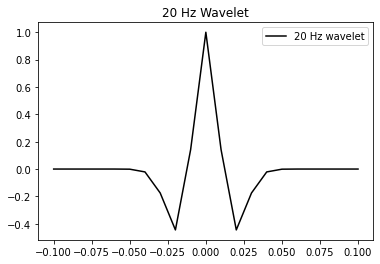

In [ ]:
ti,wavelet = rickerwavelet(20,200,10)
display(ti)
display(wavelet)

plt.plot(ti,wavelet,'black', label = '20 Hz wavelet')
plt.title("20 Hz Wavelet")
plt.legend()
plt.show()

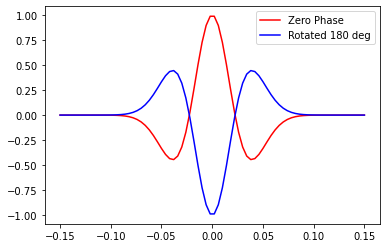

In [ ]:
#phase Rotation Wavelets
f = 10 #frequency in hertz
tn = 300 #wavelet length in ms
dt = 4 #sampling rate in ms
t,w1  = rickerwavelet(f,tn,dt)
#t0,w0  = rickerwavelet(freq,dur,deltaT)
htrans = hilbert(w1)
deg = 180  #wavelet rotation
theta = deg*np.pi/180
w2 = np.cos(theta)*htrans.real-np.sin(theta)*htrans.imag
plt.plot(t,w1,'r', label = 'Zero Phase')
plt.plot(t,w2, 'b', label = 'Rotated %s deg' %deg)
plt.legend()
plt.show()

In [ ]:
# Build the wedge model and seismic traces 
freq = 5
dur = 500
deltaT = 4
time, wave1 = rickerwavelet(freq,dur,deltaT)
samples = 250
nt = 51
#ref=[]
traces = []
for i in range(nt):
  R = np.zeros(samples)
  R[50]= 0.5
  R[52+i] = -0.5
  tr = convolve(R, wave1, mode='same')
  traces.append(tr)
  #ref.append(R)
#ref = np.asarray(ref).T
traces = np.asarray(traces).T

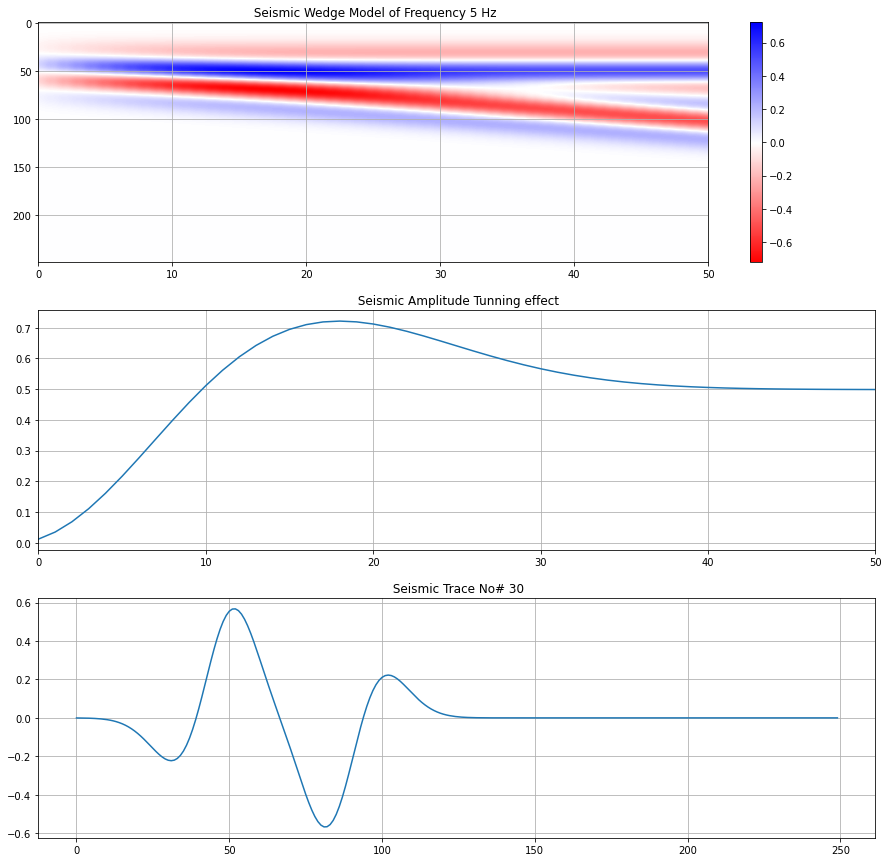

In [ ]:
# Plotting the wdge model and seismic trace

## Plotting Wedge Model 
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.imshow(traces, aspect='auto', cmap='bwr_r')
plt.title(" Seismic Wedge Model of Frequency %s" %freq + " Hz")
plt.xlim(0,50)
plt.grid()
plt.colorbar()

## Plotting Tunning thickness 
plt.subplot(3,1,2)
amp50 = traces[51,:]
plt.plot(amp50)
plt.title(" Seismic Amplitude Tunning effect")
plt.grid()
plt.xlim(0,50)

## Plotting Trace No 50 
plt.subplot(3,1,3)
trace9 = traces[:,30]
plt.plot(trace9)
plt.title(" Seismic Trace No# 30")
plt.grid()
plt.show()